In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Definitions

1. Title of Database: adult

2. Number of Attributes 
   6 continuous, 8 nominal attributes.

3. Attribute type: 

- age           : continuous.
- workclass     : Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt        : continuous.
- education     : Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num : continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation    : 
      Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship  : Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race          : White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex           : Female, Male.
- capital-gain  : continuous.
- capital-loss  : continuous.
- hours-per-week: continuous.
- native-country: 
      United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- class         : >50K, <=50K

3. Attribute Description: 

- age           : The age of an individual;
- workclass     : A general term to represent the employment status of an individual;
- fnlwgt        : Final weight. In other words, this is the number of people the census believes the entry represents;
- education     : The highest level of education achieved by an individual;
- education-num : The highest level of education achieved in numerical form;
- marital-status: Marital status of an individual. Married­civ­spouse corresponds to a civilian spouse while Married­AF­spouse is a spouse in the Armed Forces;
- occupation    : The general type of occupation of an individual;
- relationship  : Represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute and is somewhat redundant with marital status. We might not make use of this attribute at all;
- race          : Descriptions of an individual’s race;
- sex           : The biological sex of the individual;
- capital-gain  : capital gains for an individual;
- capital-loss  : capital loss for an individual;
- hours-per-week: The hours an individual has reported to work per week;
- native-country: Country of origin for an individual and;
- class         : Whether or not an individual makes more than $50,000 annually.

9. Class Distribution: 

 - Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
 - Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)




- ambos arquivos da pasta data são csv, contudo a separação em data/test e o cabeçalho do arquivo 'test' contendo '|1x3 Cross validator' sugere que pelo menos o arquivo 'test' passou por um processo de segmentação de datasets para estudos de machine learning. Testar modelos nos datasets se sobrar tempo.

In [2]:
columns = ['age', 'workclass', 'fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class']

In [3]:
df_adult_data=pd.read_csv('data/Adult.data',header=None,names=columns)
df_adult_test=pd.read_csv('data/Adult.test',header=None,skiprows=1,names=columns)

In [4]:
df=df_adult_data.append(df_adult_test)
df.reset_index(drop=True,inplace=True)


# Attributes check

In [5]:
df.info() ## nenhuma linha vazia 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  object
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  object
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  object
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  object
 13  native-country  48842 non-null  object
 14  class           48842 non-null  object
dtypes: int64(2), object(13)
memory usage: 5.6+ MB


## age
- Age of an individual. Continuous.


In [6]:
df['age'].unique() #mais de um tipo de dado: STR e int; nenhuma idade negativa.

array(['39', '50', '38', '53', '28', '37', '49', '52', '31', '42', '30',
       '23', '32', '40', '34', '25', '43', '54', '35', '59', '56', '19',
       '20', '45', '22', '48', '21', '24', '57', '44', '41', '29', '18',
       '47', '46', '36', '79', '27', '67', '33', '76', '17', '55', '61',
       '70', '64', '71', '68', '66', '51', '58', '26', '60', '90', '75',
       '65', '77', '62', '63', '80', '72', '74', '69', '73', '81', '78',
       '88', '82', '83', '84', '85', 'B', '86', '87', 'D', 25, 38, 28, 44,
       18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20, 37, 40, 72, 45,
       22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30, 47, 41, 19, 69,
       50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77, 80, 62, 35, 68,
       66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85, 76, 84, 89, 88,
       87], dtype=object)

In [7]:
df['age']=df['age'].astype(str) #ETL

In [8]:
df['age_is_numeric']=df['age'].apply(lambda x : x.isnumeric() ) #ETL

In [9]:
df[df['age_is_numeric']==False] #Apenas duas linhas onde a iddade não é numérica

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,age_is_numeric
22197,B,Self-emp-not-inc,182771,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,48,South,>50K,False
32540,D,State-gov,252208,HS-grad,9,Separated,Adm-clerical,Own-child,White,Female,0,0,40,United-States,<=50K,False


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

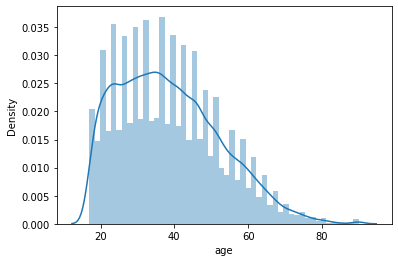

In [10]:
sns.distplot(df[df['age_is_numeric']==True]['age'])

- Uma vez que a distribuição dos dados não está muito distorcida, e a quantidade de linhas do dataset a serem tratadas é pequena se comparada ao tamanho total da base, uma tratativa plausível é substituir tais valores não numéricos pela média das idades, ao invés de, por exemplo, deletar tais linhas, evitando assim a perda de dados das outras colunas.

In [11]:
media_idades=df[df['age_is_numeric']==True]['age'].astype(float).mean() #ETL

In [12]:
df['age']=df['age'].apply(lambda x : float(x) if x.isnumeric() else media_idades) #ETL

In [13]:
np.sort(df['age'].unique())

NameError: name 'np' is not defined

In [ ]:
df.drop('age_is_numeric', axis=1, inplace=True)#ETL

## workclass
- A general term to represent the employment status of an individual;
- Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

In [ ]:
df['workclass'].unique() # caracter "?", espaços em branco.

In [ ]:
df['workclass']=df['workclass'].apply(lambda x: x.replace(' ',''))  #ETL

In [ ]:
df[df['workclass']=='?'] # 2799 linhas sem dado. Substituir por None. 

In [ ]:
df['workclass']=df['workclass'].apply(lambda x: None if x=='?' else x)  #ETL

## fnlwgt        
- Final weight. In other words, this is the number of people the census believes the entry represents;
- Continous

In [ ]:
df['fnlwgt'].unique()

In [ ]:
df['fnlwgt']=df['fnlwgt'].astype(str)#ETL

In [ ]:
df['fnlwgt']=df['fnlwgt'].apply(lambda x: x.replace(' ','')) #ETL

In [ ]:
df['fnlwgt_is_numeric']=df['fnlwgt'].apply(lambda x : x.isnumeric() ) #ETL

In [ ]:
df[df['fnlwgt_is_numeric']==False] #

In [ ]:
media_fnlwgt=df[df['fnlwgt_is_numeric']==True]['fnlwgt'].astype(float).mean() #ETL
df['fnlwgt']=df['fnlwgt'].apply(lambda x : float(x) if x.isnumeric() else media_fnlwgt) #ETL
df.drop('fnlwgt_is_numeric', axis=1, inplace=True)#ETL

## education     
- The highest level of education achieved by an individual;
- Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

In [ ]:
df['education'].unique()

In [ ]:
df['education']=df['education'].apply(lambda x: x.replace(' ',''))#ETL

## education-num 
- The highest level of education achieved in numerical form;
- Continuos

In [ ]:
np.sort(df['education-num'].unique())

In [ ]:
df['education-num'].describe() #sem necessidade de tratamento: sem Nulos e datatype uniforme

## marital-status
- Marital status of an individual. Married­civ­spouse corresponds to a civilian spouse while Married­AF­spouse is a spouse in the Armed Forces;
- Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

In [ ]:
df['marital-status'].unique()

In [ ]:
df['marital-status']=df['marital-status'].apply(lambda x: x.replace(' ','')) #ETL

## occupation :
- The general type of occupation of an individual;
- Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

In [ ]:
df['occupation'].unique()

In [ ]:
df['occupation']=df['occupation'].apply(lambda x: x.replace(' ',''))#ETL
df['occupation']=df['occupation'].apply(lambda x: None if x=='?' else x) #ETL

## relationship 
- Represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute and is somewhat *redundant with marital status. We might not make use of this attribute at all;*
- Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

In [ ]:
df['relationship'].unique()

In [ ]:
df['relationship']=df['relationship'].apply(lambda x: x.replace(' ',''))#ETL

## race 
- Descriptions of an individual’s race;
- White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.


In [ ]:
df['relationship'].unique()

## sex
- The biological sex of the individual;
- Female, Male.

In [ ]:
df['sex'].unique()

In [ ]:
df['sex']=df['sex'].apply(lambda x: x.replace(' ',''))#ETL

## capital-gain : 
- capital gains for an individual;
- continuous.

In [ ]:
df['capital-gain'].unique()

In [ ]:
df['capital-gain']=df['capital-gain'].astype(str)#ETL
df['capital-gain']=df['capital-gain'].apply(lambda x: x.replace(' ','')) #ETL
df['capital-gain_is_numeric']=df['capital-gain'].apply(lambda x : x.isnumeric() ) #ETL
# df[df['capital-gain_is_numeric']==False]


In [ ]:
media_fnlwgt=df[df['capital-gain_is_numeric']==True]['capital-gain'].astype(float).mean() #ETL
df['capital-gain']=df['capital-gain'].apply(lambda x : float(x) if x.isnumeric() else media_fnlwgt) #ETL
df.drop('capital-gain_is_numeric', axis=1, inplace=True)#ETL

##  capital-loss 
- capital loss for an individual;
- continuous.

In [ ]:
np.sort(df['capital-loss'].unique())

## hours-per-week
- The hours an individual has reported to work per week;
- continuous.

In [ ]:
df['hours-per-week'].unique()

In [ ]:
df['hours-per-week']=df['hours-per-week'].astype(str)#ETL
df['hours-per-week']=df['hours-per-week'].apply(lambda x: x.replace(' ','')) #ETL
df['hours-per-week_is_numeric']=df['hours-per-week'].apply(lambda x : x.isnumeric() ) #ETL
# df[df['capital-gain_is_numeric']==False]
media_fnlwgt=df[df['hours-per-week_is_numeric']==True]['hours-per-week'].astype(float).mean() #ETL
df['hours-per-week']=df['hours-per-week'].apply(lambda x : float(x) if x.isnumeric() else media_fnlwgt) #ETL
df.drop('hours-per-week_is_numeric', axis=1, inplace=True)#ETL

## native-country: 
- Country of origin for an individual and;
- United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. 

In [ ]:
np.sort(list(df['native-country'].unique()))

In [ ]:
df['native-country']=df['native-country'].astype(str) #ETL
df['native-country']=df['native-country'].apply(lambda x: x.replace(' ','')) #ETL
df['native-country']=df['native-country'].apply(lambda x: None if x=='?' else x) #ETL

## class : 
- Whether or not an individual makes more than $50,000 annually.
->50K, <=50K

In [ ]:
df['class'].unique()

In [ ]:
df['class']=df['class'].apply(lambda x: x.replace(' ','').replace('.','')) 

# Inserção em banco de dados.
- Feito nos arquivos .py (descrito no Readme)

# EXPLORE

In [ ]:
sns.pairplot(df)

 # TODO
 - Sem correlação aparente entre variáveis numéricas desnormalizadas
 - Uma vez que a variável alvo é 'class', avaliar distribuição de outras variáveis categoricas com a variável alvo
 - avaliar variaveis numericas e variavel categorica 
 
 - descrever modelod e machine learning
 
 - descrever metodo de pandas.to_sql()
 - fazer metodo com tabela auxiliar e raw_querry do sqlalchemy

# Machine Learninng Model

In [ ]:
data = df.iloc[:,:-1]

X= data.iloc[:,:-1]
X= pd.get_dummies(X)
Y=data['class']

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.75)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

In [ ]:
predictions = logisticRegr.predict(x_test)

In [ ]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

In [ ]:
from sklearn import metrics

In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gaussian = GaussianNB()

In [ ]:
gaussian.fit(x_train, y_train)

In [ ]:
predictions = gaussian.predict(x_test)

In [ ]:
score = gaussian.score(x_test, y_test)
print(score)

In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

In [ ]:
pip freeze